# Clustering with wordcloud


## Key Steps
- **Data Loading and Parsing:**
  - XML files are parsed using `xml.  etree.   ElementTree` and `BeautifulSoup` to extract text content.
- **Text Preprocessing:**
  - Preprocessing includes tokenization,  lemmatization, stop word removal, and regular expression cleaning.
  - `spacy` and `nltk` are used for these tasks.
- **Word Cloud Visualization:**
  - A word cloud is generated to visualize the most frequent words in the text.
  - Uses `WordCloud` from the `wordcloud` library and `matplotlib` for plotting.
- **Feature Extraction with `CountVectorizer`:**
  - Converts the text data into a matrix of token counts.
  - Updated to use `get_feature_names_out()` for compatibility with newer versions of `scikit-learn`.
- **TF-IDF Transformation and Normalization:**
  - The `TfidfTransformer` is applied to the count matrix to convert raw frequency counts into TF-IDF features.
  - Data is normalized afterward.
- **Clustering with K-Means:**
  - K-Means clustering is performed on the transformed data.
  - The elbow method is used to determine the optimal number of clusters.
- **Cluster Assignment and Visualization:**
  - Texts are grouped by their cluster labels.
  - Word clouds are generated for each cluster to visualize key terms.
- **Additional Steps:**
  - Reshaping and appending data for combining the clean text with cluster labels.
  - Tokenization of sentences for further analysis.

## Differences Between the Two Versions:

- **Structure and Flow:**
  - The updated code is more structured, with clearer delineation of each stage in the NLP pipeline.
  - Intermediate outputs such as word clouds and frequency plots are included for better visualization.

- **Use of `get_feature_names_out`:**
  - The updated code correctly uses `get_feature_names_out()` instead of the deprecated `get_feature_names()` method from `CountVectorizer`.

- **Error Handling and Data Manipulation:**
  - The updated code shows the addition of error handling for clustering and reshaping data arrays.

- **Visualization Enhancements:**
  - Enhanced use of word clouds to represent clusters.
  - Clear titles and axis labels for better readability.

- **Tokenization and Word Analysis:**
  - The updated code introduces tokenization of sentences and a new column to store these tokens.

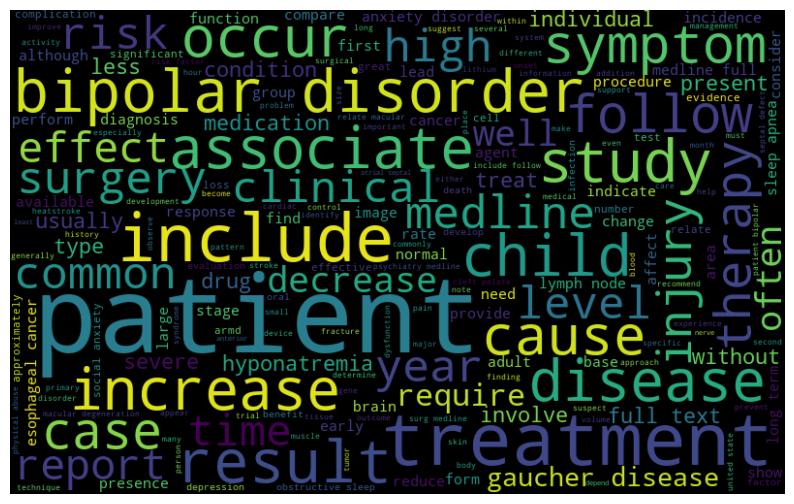

[1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1]


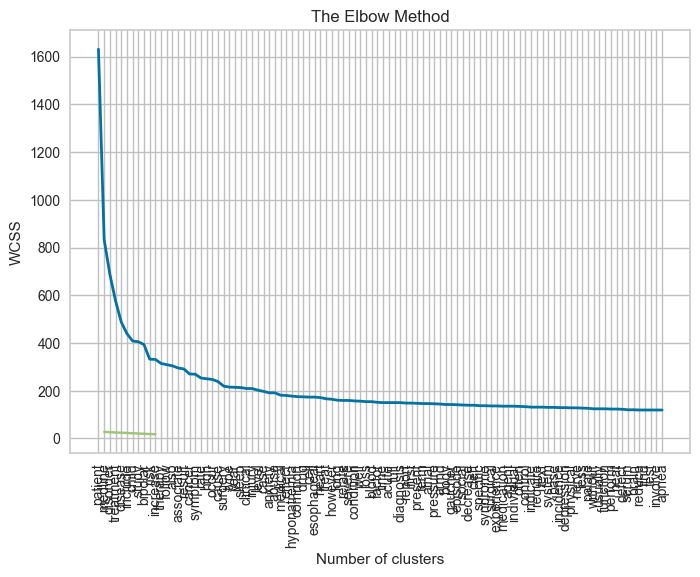

Cluster 0:
 tilt
 vertigo
 patient
 table
 head
 syncope
 heart
 positional
 otolith
 nystagmus
 canal
 testing
 test
 benign
 semicircular
 position
 gurney
 side
 hallpike
 blood
 pressure
 maneuver
 rate
 vasovagal
 vestibular
 hang
 orthostatic
 epley
 minute
 fall
 posterior
 symptom
 direction
 occur
 upright
 medline
 supine
 cause
 turn
 cardiology
 paroxysmal
 beat
 edge
 isoproterenol
 asystole
 hypotension
 opposite
 baseline
 positive
 treatment
Cluster 1:
 divide
 nerve
 auditory
 nucleus
 cortex
 cochlear
 foot
 anesthesia
 lateral
 appendicitis
 needle
 fiber
 ankle
 medial
 malleolus
 tendon
 lobe
 gyrus
 component
 anesthetic
 brain
 sound
 posterior
 brainstem
 ampicillin
 hsee
 pathway
 superior
 temporal
 area
 tibial
 layer
 cell
 regional
 epinephrine
 clavulanate
 cilastin
 orimipenem
 ticarcillin
 orticarcillin
 orpiperacillin
 piperacillin
 orampicillin
 ormeropenem
 tazobactam
 sulbactam
 structure
 sulcus
 base
 frontal
Cluster 2:
 patient
 atrial
 gaucher
 a

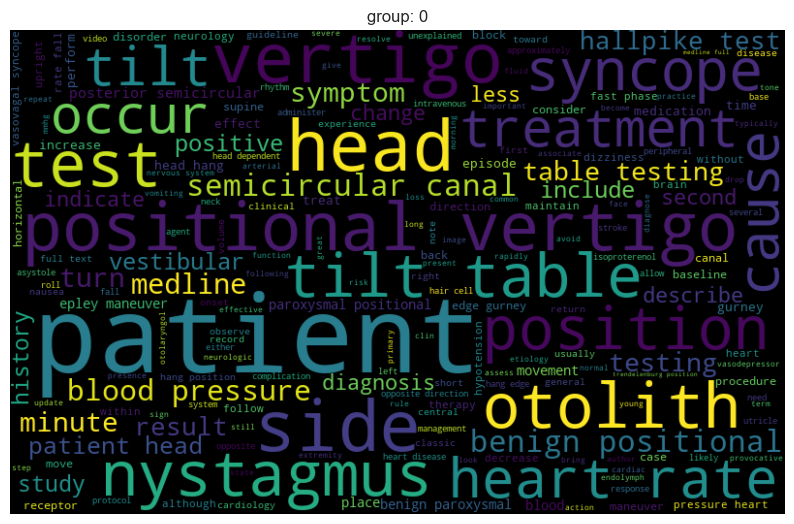

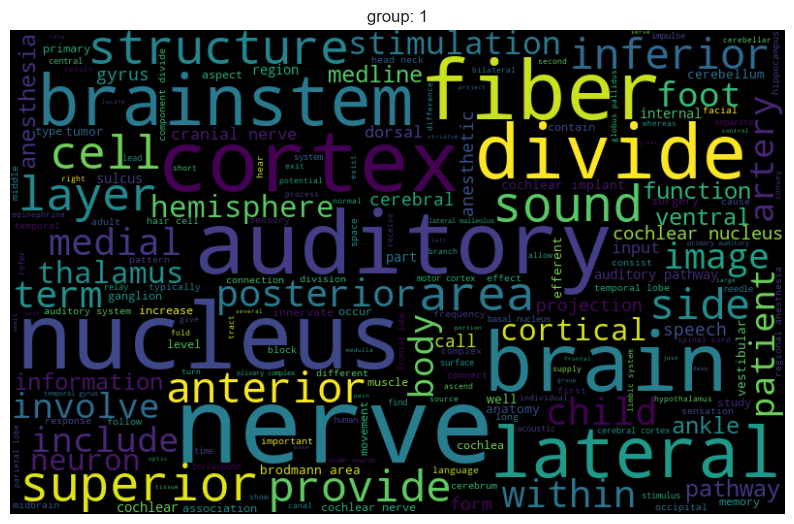

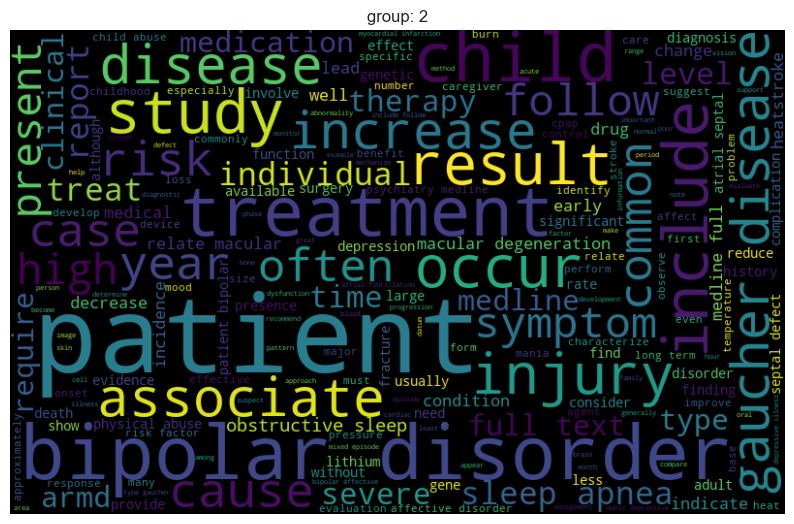

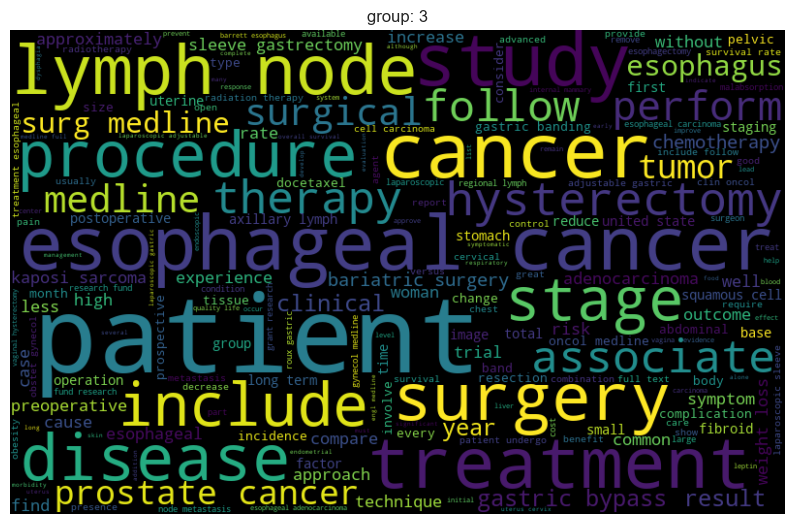

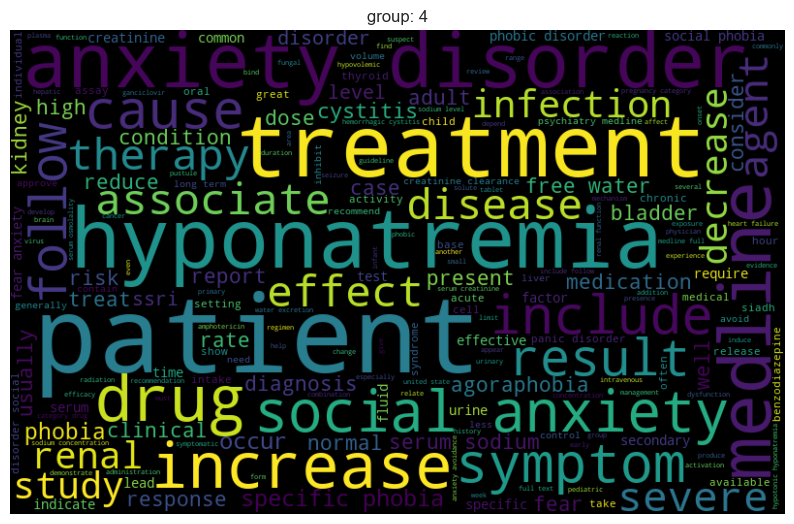

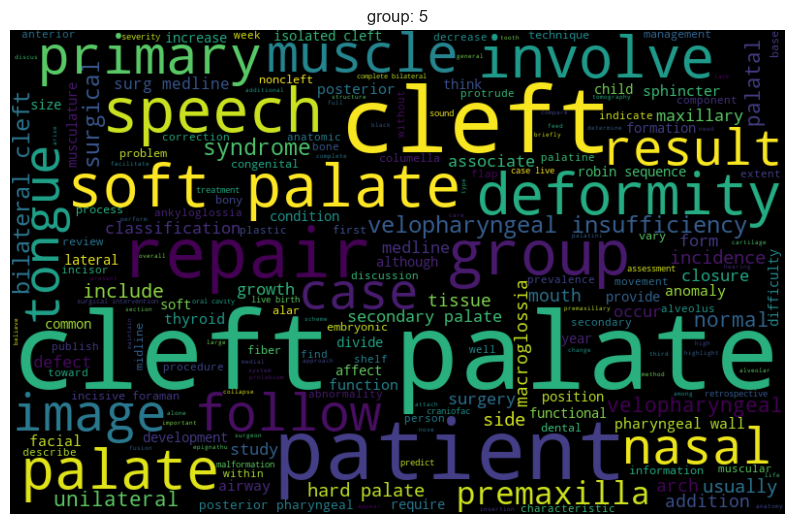

                                                text  group  \
0  nonexudative relate macular degeneration armd ...      2   
1  atrial septal defect commonly recognize congen...      2   
2  myocardial infarction coronary artery disease ...      2   
3  heat illness view continuum illness relate bod...      2   
4  tilt table test simple noninvasive informative...      0   

                                               words  
0  [nonexudative, relate, macular, degeneration, ...  
1  [atrial, septal, defect, commonly, recognize, ...  
2  [myocardial, infarction, coronary, artery, dis...  
3  [heat, illness, view, continuum, illness, rela...  
4  [tilt, table, test, simple, noninvasive, infor...  


In [3]:
import os
import pandas as pd
import numpy as np
import bs4 as bs
import urllib.request
import re
import spacy
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from glob import glob
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.cluster import KMeans
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import xml.etree.ElementTree as ET

# Setup
lem = WordNetLemmatizer()
os.chdir(r'E:\3.spyder\XML web Scrapping\xml_many articles')

# Load XML files
path = r"E:\3.spyder\XML web Scrapping\xml_many articles"
all_files = glob(os.path.join(path, "*.xml"))
dfs = []
for filename in all_files:
    tree = ET.parse(filename)
    root = tree.getroot()
    root = ET.tostring(root, encoding='utf8').decode('utf8')
    dfs.append(root)

# Parsing function
def data_preprocessing(each_file):
    parsed_article = bs.BeautifulSoup(each_file, 'xml')
    paragraphs = parsed_article.find_all('para')
    article_text_full = ""
    for p in paragraphs:
        article_text_full += p.text
    return article_text_full

# Apply preprocessing to each file
data = [data_preprocessing(each_file) for each_file in dfs]

# Function to remove stopwords and clean text
def remove_stop_word(file):
    nlp = spacy.load("en_core_web_sm")
    punctuations = string.punctuation
    stopwords_list = nltk.corpus.stopwords.words('english') + list(punctuations)
    
    doc = nlp(file, disable=['parser', 'ner'])
    tokens = [tok.lemma_.lower().strip() for tok in doc if tok.lemma_ != '-PRON-']
    tokens = [tok for tok in tokens if tok not in stopwords_list and tok not in punctuations]
    
    s = [lem.lemmatize(word) for word in tokens]
    tokens = ' '.join(s)
    
    # Clean up any unwanted characters
    article_text = re.sub(r'\[[0-9]*\]', ' ', tokens)
    article_text = re.sub(r'\s+', ' ', article_text)
    formatted_article_text = re.sub('[^a-zA-Z]', ' ', article_text)
    formatted_article_text = re.sub(r'\s+', ' ', formatted_article_text)
    formatted_article_text = re.sub(r'\W*\b\w{1,3}\b', "", formatted_article_text)
  
    return formatted_article_text

# Clean the data by removing stopwords
clean_data = [remove_stop_word(file) for file in data]

# Combine all words for the word cloud
all_words = ' '.join(clean_data)

# Generate and display WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

# Plot frequency distribution of words
fredi = word_tokenize(all_words)
freqDist = FreqDist(fredi)
freqDist.plot(100)

# Vectorize the text using CountVectorizer
vectorizer = CountVectorizer(stop_words=stopwords.words('english')).fit(clean_data)
X = vectorizer.transform(clean_data).toarray()

# Apply TfidfTransformer
tran = TfidfTransformer().fit(X)
X = tran.transform(X).toarray()
X = normalize(X)

# Perform KMeans clustering
kmeans = KMeans(n_clusters=2).fit(X)
print(kmeans.predict(X))

# Elbow method to find optimal clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# KMeans clustering with 6 clusters
true_k = 6
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

# Get order of centroids
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()

for i in range(true_k):
    print(f'Cluster {i}:')
    for ind in order_centroids[i, :50]:
        print(f' {terms[ind]}')

# Get predictions
result = np.ndarray.tolist(model.predict(X))

# Check type of result
print(type(result))

# Reshape and append results
clean_data = np.reshape(clean_data, (len(clean_data), 1))
result = np.reshape(result, (len(result), 1))
cluster_result_data = np.append(clean_data, result, axis=1)

# Convert to DataFrame and adjust column names
cluster_result_data = pd.DataFrame(cluster_result_data, columns=['text', 'group'])
cluster_result_data['group'] = cluster_result_data['group'].astype(int)

# WordCloud for each group
for num in range(true_k):
    normal_words = ' '.join([text for text in cluster_result_data.loc[cluster_result_data['group'] == num, 'text']])
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.title(f'group: {num}')
    plt.show()

# Tokenize words for each group
def token(sentence):
    return sentence.split()

cluster_result_data['words'] = [token(sentence) for sentence in cluster_result_data['text']]

# Display final DataFrame
print(cluster_result_data.head())
